The data consists of:

**For each episode**
- Interactions
  - times the characters speak within the same scene
- Mentions
  - times the characters are mentioned within the same scene
- All
  - same as interactions but added with r2d2 and chewbacca

**Full**
- All data from 6 episodes


Network Statistics for Interactions:
Number of nodes: 110
Number of edges: 398
Network density: 0.066
Average clustering coefficient: 0.677

Network Statistics for Mentions:
Number of nodes: 113
Number of edges: 817
Network density: 0.129
Average clustering coefficient: 0.750

Interactions Centrality Analysis:

Top 5 characters by Degree Centrality:
ANAKIN: 0.376
OBI-WAN: 0.321
PADME: 0.303
C-3PO: 0.303
QUI-GON: 0.239

Top 5 characters by Betweenness Centrality:
OBI-WAN: 0.213
C-3PO: 0.193
HAN: 0.181
ANAKIN: 0.162
LUKE: 0.138

Top 5 characters by Eigenvector Centrality:
ANAKIN: 0.330
OBI-WAN: 0.297
PADME: 0.287
QUI-GON: 0.256
C-3PO: 0.254

Mentions Centrality Analysis:

Top 5 characters by Degree Centrality:
OBI-WAN: 0.536
R2-D2: 0.536
ANAKIN: 0.509
C-3PO: 0.464
PADME: 0.455

Top 5 characters by Betweenness Centrality:
OBI-WAN: 0.132
R2-D2: 0.122
ANAKIN: 0.102
LUKE: 0.097
C-3PO: 0.078

Top 5 characters by Eigenvector Centrality:
R2-D2: 0.251
OBI-WAN: 0.248
ANAKIN: 0.239
C-3PO: 0.224
P

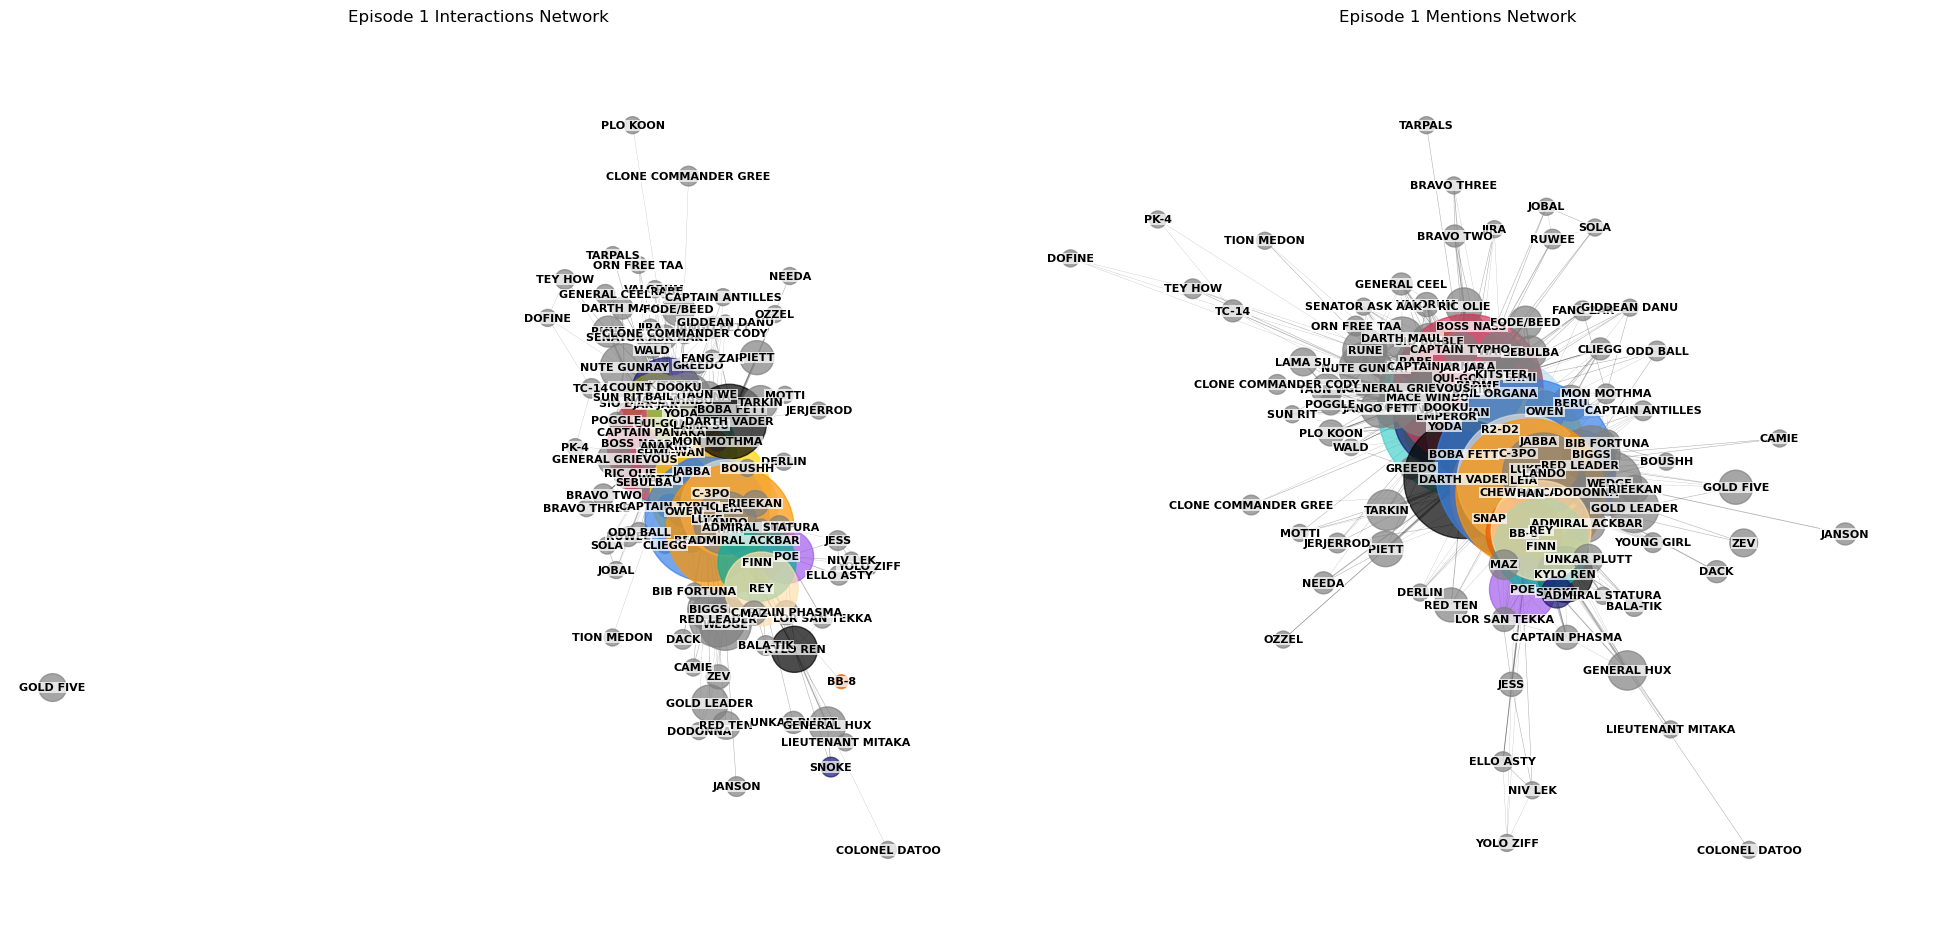

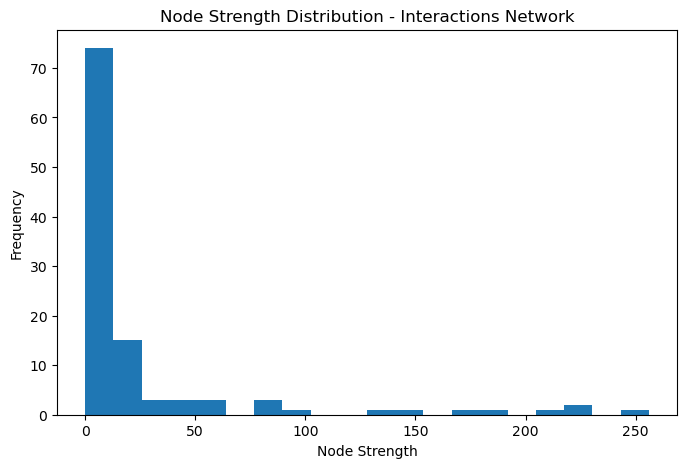

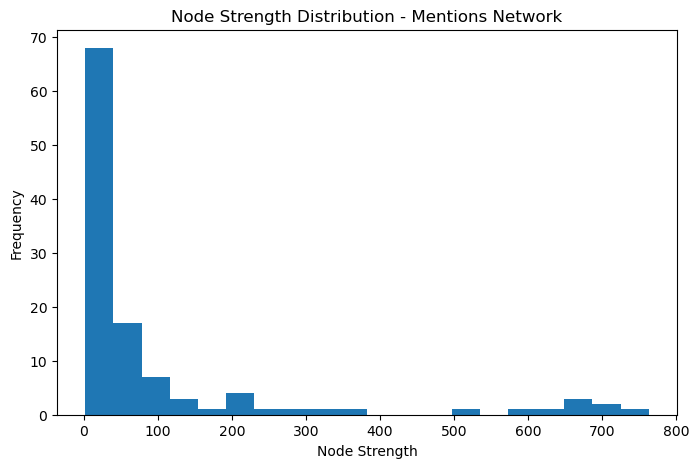

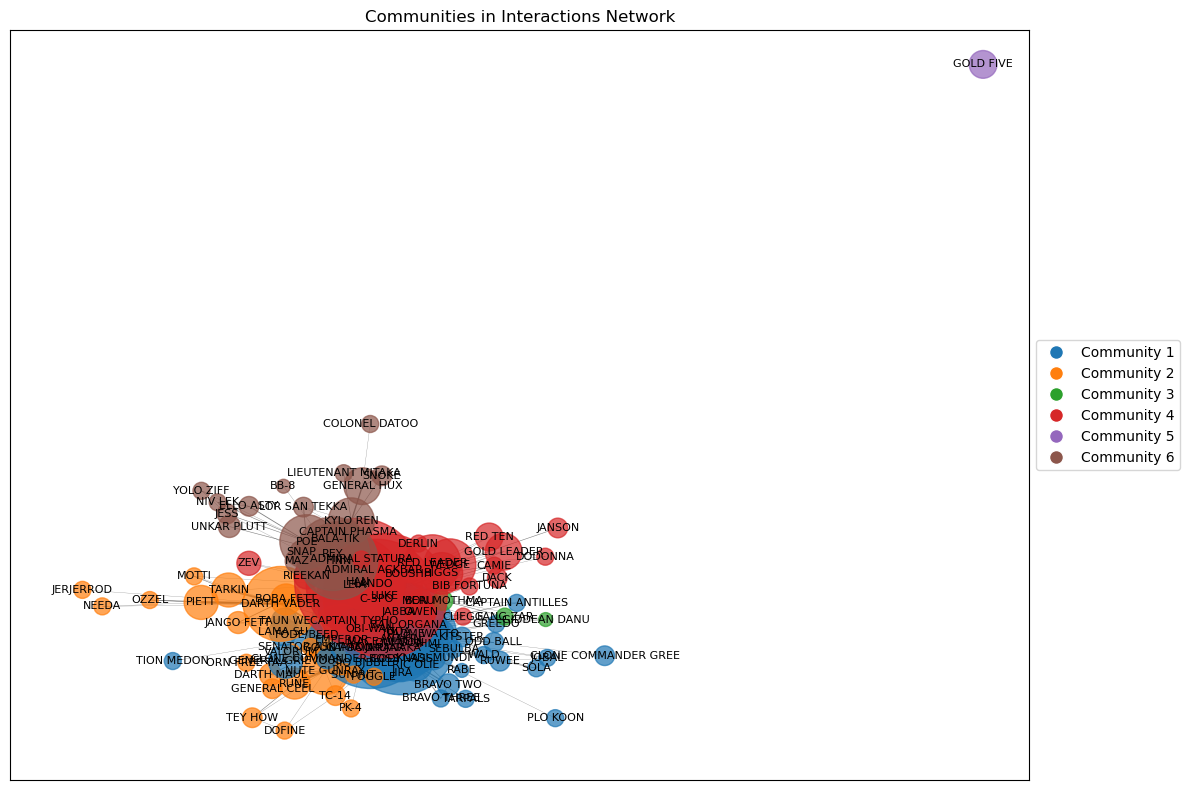

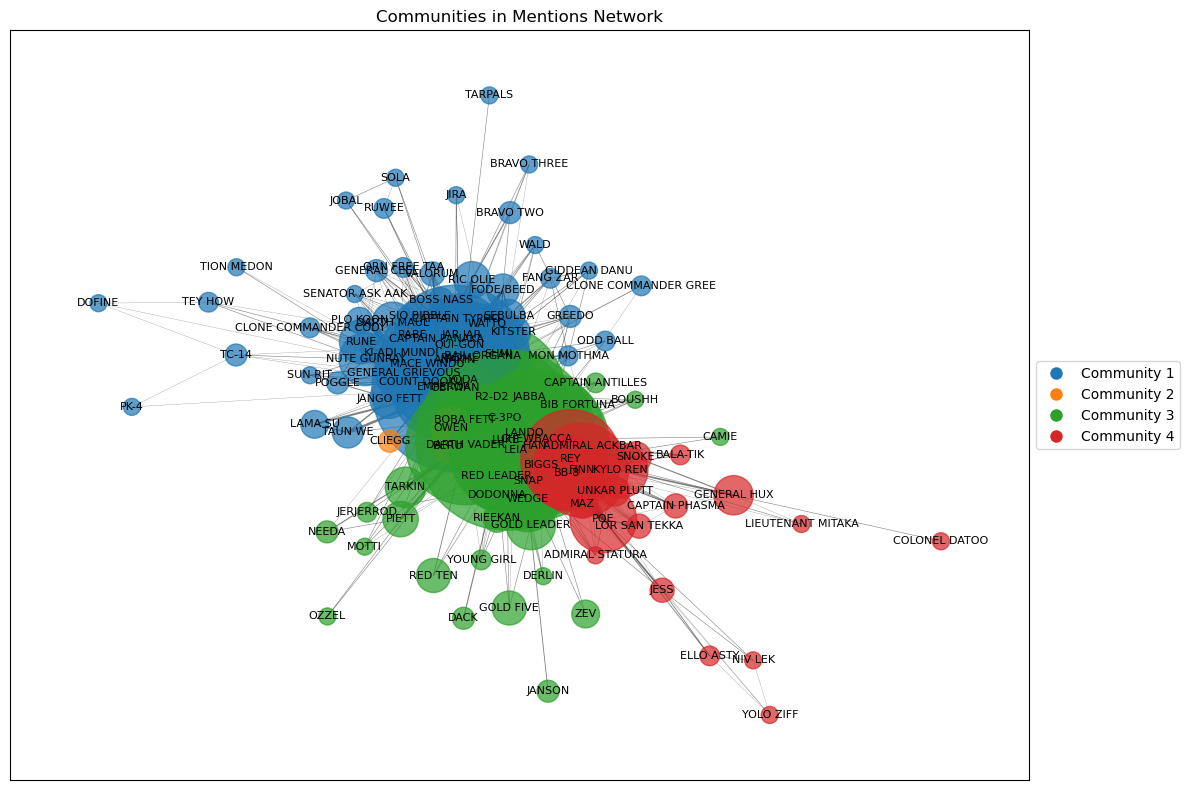

In [6]:
#!/usr/bin/env python
# coding: utf-8

# The data consists of:
# 
# **For each episode**
# - Interactions
#   - times the characters speak within the same scene
# - Mentions
#   - times the characters are mentioned within the same scene
# - All
#   - same as interactions but added with r2d2 and chewbacca
# 
# **Full**
# - All data from 6 episodes

#!/usr/bin/env python
# coding: utf-8

import numpy as np
import pandas as pd
import json
import networkx as nx
import nxviz as nv
from nxviz import annotate
from nxviz import nodes
from nxviz import edges
from nxviz.plots import aspect_equal, despine

import matplotlib.pyplot as plt

from pyvis.network import Network

import importlib
import utils
import centralities
import communities
importlib.reload(utils)

interactions: dict = utils.load_json("data/starwars-full-interactions.json")
mentions: dict = utils.load_json("data/starwars-full-mentions.json")
all_interactions: dict = utils.load_json(
    "data/starwars-full-interactions-allCharacters.json"
)

G_interactions = nx.Graph(name="Interactions")
G_mentions = nx.Graph(name="Mentions")

G_interactions = utils.get_graph_with_nodes_and_edges(G_interactions, interactions)
G_mentions = utils.get_graph_with_nodes_and_edges(G_mentions, mentions)

utils.get_network_statistics(G_interactions)
utils.get_network_statistics(G_mentions)

centralities.get_actor_centralities(
    G_interactions, ["degree", "betweenness", "eigenvector"]
)
centralities.get_actor_centralities(
    G_mentions, ["degree", "betweenness", "eigenvector"]
)

try:
    communities_interactions = communities.detect_communities(
        G_interactions, "Interactions Network"
    )
    communities_mentions = communities.detect_communities(G_mentions, "Mentions Network")
except Exception as e:
    print(f"Error in community detection: {str(e)}")

import plots

plots.plot_networks(G_interactions, G_mentions)
plots.plot_strength_distribution(G_interactions, "Interactions Network")
plots.plot_strength_distribution(G_mentions, "Mentions Network")
plots.plot_communities(G_interactions, communities_interactions, "Interactions Network")
plots.plot_communities(G_mentions, communities_mentions, "Mentions Network")
